# Introduction to Linear Algebra (Answer Keys)

In this section we are going to go over some basic Linear Algebra operations in Python. <br>

This tutorial can be deployed in [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Lecture_Notes/Notes/Coding/answers/intro_linear_algebra.ipynb)


In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

From our previous lecture, we saw that under the structure of **tensors** we can define the following structures,
1. **Scalars** -> zero-order tensors
2. **Vectors** -> fist-order tensors
3. **Matrices** -> second-order tensors

In [29]:
# scalar 
x = np.array(10.)
print('scalar')
print('shape', x.shape)
print('---------------')

# vectors
x = np.array([10.])
print('vector')
print('shape', x.shape)

x = np.array([10,11,12,13,14,15])
print('shape', x.shape)
print('---------------')


# matrices
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('matrix')
print(x)
print('shape', x.shape)
print('---------------')

scalar
shape ()
---------------
vector
shape (1,)
shape (6,)
---------------
matrix
[[1 2 3]
 [4 5 6]
 [7 8 9]]
shape (3, 3)
---------------


# Operations on Tensors 
In class we saw that tensors can have two types of operations:
1. Elementwise operations
2. Not-elementwise operations 

## Elementwise operations for vectors
1. Scalar multiplication,   ``c*v``
2. Vector addition,  ``u + v``
3. Elementwise multiplication, ``u*v``

In [3]:
# Defining a vector
v = np.array([1, 2, 3])
u = np.array([4, 5, 6])
print("Vector v:", v)

# Basic operations on vectors
print("Scalar multiplication:", 2 * v)
print("Vector addition:", v + u)
print("Elementwise multiplication:",u*v)

Vector v: [1 2 3]
Scalar multiplication: [2 4 6]
Vector addition: [5 7 9]
Elementwise multiplication: [ 4 10 18]


I am a big fan of Numpy; however given that you are new to python we are going to code these three operations from scratch.

In [18]:
# Scalar multiplication
# write a function that iterates over the vector and multiplies each element with c

def scalar_multiplication(c,x):
    cx = x.copy()
    n = x.shape[0] # number of elements
    for i in range(n):
        cx[i] = c*x[i]
    return cx

In [19]:
# test the scalar_multiplication function
x = np.random.uniform(size=(5,)) # random vector
c = 2. # scalar value 
print('vector', x)
print('ours', scalar_multiplication(c, x))
print('Numpy', c*x)

vector [0.96860437 0.24317104 0.14224979 0.91686355 0.76665946]
ours [1.93720874 0.48634208 0.28449958 1.8337271  1.53331892]
Numpy [1.93720874 0.48634208 0.28449958 1.8337271  1.53331892]


In [27]:
# Vector addition
# write a function that computes the addition of two vectors. 

def vector_addition(u,v):
    nu = u.shape[0]
    nv = v.shape[0]
    
    u_plus_v = np.zeros_like(u)
    for i in range(nu):
        u_plus_v[i] = u[i] + v[i]
    return u_plus_v

In [24]:
# test the vector_addition function
u = np.random.uniform(size=(5,))  # random vector
v = np.random.uniform(size=(5,))  # random vector

print('vector u', u)
print('vector v', v)
print('ours', vector_addition(u, v))
print('Numpy', u+v)

vector u [0.91919339 0.54248777 0.87139839 0.24713116 0.81257307]
vector v [0.27523367 0.9397578  0.88050612 0.53049842 0.42636137]
ours [1.19442706 1.48224557 1.75190451 0.77762958 1.23893444]
Numpy [1.19442706 1.48224557 1.75190451 0.77762958 1.23893444]


In [26]:
# test the vector_addition function for two vectors with different dimensions
u = np.random.uniform(size=(5,))  # random vector
v = np.random.uniform(size=(6,))  # random vector

print('vector u', u)
print('vector v', v)
print('ours', vector_addition(u, v))
print('Numpy', u+v)

vector u [0.23958816 0.19458448 0.35661607 0.7616097  0.73557192]
vector v [0.63002631 0.67544285 0.79867713 0.79017802 0.69620514 0.97445557]
ours [0.86961448 0.87002734 1.15529321 1.55178772 1.43177706]


ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [ ]:
# Vector multiplication
# write a function that multiplies two vectors

def vector_multiplication(u, v):
    nu = u.shape[0]
    nv = v.shape[0]

    u_times_v = np.zeros_like(u)
    for i in range(nu):
        u_times_v[i] = u[i] * v[i]
    return u_times_v

In [30]:
# test the vector_addition function for two vectors with different dimensions
u = np.random.uniform(size=(5,))  # random vector
v = np.random.uniform(size=(5,))  # random vector

print('vector u', u)
print('vector v', v)
print('ours', vector_addition(u, v))
print('Numpy', u+v)

vector u [0.82871734 0.64247534 0.01954352 0.35501259 0.91102268]
vector v [0.25488783 0.23817648 0.42073386 0.50810497 0.18041714]
ours [1.08360517 0.88065182 0.44027737 0.86311755 1.09143982]
Numpy [1.08360517 0.88065182 0.44027737 0.86311755 1.09143982]


There are many other element-wise operations for vectors. <br>
For example, in previous classes we use a function to compute the pressure given a volume. 

Let's use the idea gas law to compute the pressure given a volume at a constant temperature. 
From the well known equation, $PV= nRT$, we get,
$$ 
P = \frac{nRT}{V}
$$

Plot Isotherms of an ideal gas for different temperatures, for simplicity, assume $nR = 1$.


In [41]:
def pressure_function(v,T):
    nR = 1.
    p = v.copy()
    for i in range(v.shape[0]):
        vi = v[i]
        p[i] = nR * T / vi
    
    return p

Text(0, 0.5, 'Pressure')

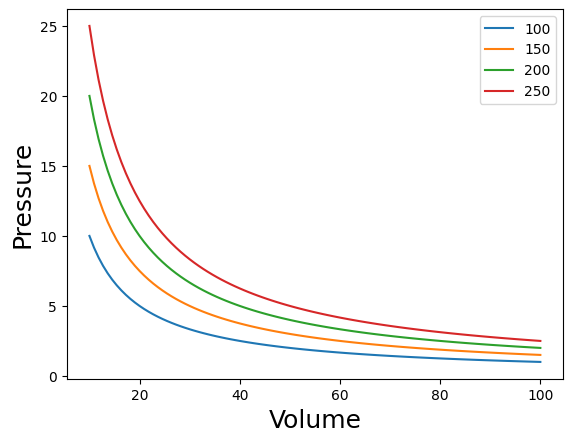

In [43]:
# test your function, plot some isotherms curves
v_min = 10
v_max = 100
n_v_grid = 100
v = np.linspace(v_min, v_max,n_v_grid)
T = 1.

for ti in [100,150,200,250]:
    p = pressure_function(v,ti)

    plt.plot(v, p, label=ti)

plt.legend()
plt.xlabel('Volume',fontsize=18)
plt.ylabel('Pressure',fontsize=18)

## Dot product
As we will see in the course. The **dot product** is one of the most used functions in linear algebra.
$$
\mathbf{u} \cdot \mathbf{v} = \mathbf{u}\top \mathbf{v} = \|\mathbf{u} \| \|\mathbf{v} \| \cos(\theta)
$$

We can also compute the dot product using the following equation,
$$
\mathbf{u} \cdot \mathbf{v} = \sum_{i=0}^{n} u_i v_i
$$

Let's compute the angle $\theta$ using both equations. 
$$
\theta = \cos^{-1} \left (\frac{\sum_{i=0}^{n} u_i v_i}{\|\mathbf{u} \| \|\mathbf{v} \|}\right ),
$$
where, $\cos^{-1}(x)$ is the [arc cosine](https://en.wikipedia.org/wiki/Inverse_trigonometric_functions). <br>

For this task, we are required the following building blocks,
1. The dot product given the sum of the multiplication between the elements of the vectors.
2. The norm of a vector, $\|\mathbf{u} \| = \sqrt{\mathbf{u}\cdot \mathbf{u}}$
3. Arc cosine, which in Numpy is ``np.arccos()``.



# Distance between vectors
We can also quantify the Euclidean distance between vectors. 
$$
d(\mathbf{u},\mathbf{v}) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2 }.
$$

We can also write the Euclidean distance as,
$$
d(\mathbf{u},\mathbf{v}) = \| \mathbf{u} - \mathbf{v} \|_2.
$$

In [44]:
# at home create a function for the Euclidean distance using all the resources from this tutorial.
def EuclideanDistance_full(u,v):
    nu = u.shape[0]
    nv = v.shape[0]
    d = 0.
    for i in range(nu):
        d += (u[i] - v[i])**2
    return d

In [48]:
# Euclidean distance using Numpy
def EuclideanDistance(u,v):
    uv = u - v
    uv = np.power(uv,2)
    uv_sum = np.sum(uv)
    return np.sqrt(uv_sum)

In [57]:
u = np.random.uniform(size=(5,))  # random vector
v = np.random.uniform(size=(5,))  # random vector

print('vector u', u)
print('vector v', v)

print('ED: ', EuclideanDistance(u,v))

# prove that d(u,v) = d(v,u)


vector u [0.20613236 0.0186927  0.685624   0.97472214 0.1260474 ]
vector v [0.60556173 0.71676918 0.57700908 0.50440666 0.47427551]
ED:  1.0005554741612328


We can use the following function in Numpy to verify our code.<br>
[``np.linalg.norm(x)``](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [56]:
print('ED(numpy): ', np.linalg.norm(u-v))

ED(numpy):  0.7818012460429007


# Cross product

Next class, I will introduce to you guys an additional vector operation named **cross product**.<br>
For three dimensional vectors, using the physics notation, $\mathbf{u} = u_x\mathbf{i} + u_y\mathbf{j} + u_z\mathbf{k}$, where $\mathbf{i},\mathbf{j}$ and $\mathbf{k}$ are unitary vectors, the cross product is defined as,
$$
\mathbf{u} \times \mathbf{v} = (u_y v_z - u_z v_y)\mathbf{i} +(u_z v_x - u_x v_z)\mathbf{j} + (u_x v_y - u_y v_x)\mathbf{k}\\
\mathbf{u} \times \mathbf{v} = [u_y v_z - u_z v_y, u_z v_x - u_x v_z,u_x v_y - u_y v_x]
$$

Compute the cross product of two vectors in three dimensions.

You can verify that the cross product using Numpy's cross product function,
[``np.cross()``](https://numpy.org/doc/stable/reference/generated/numpy.cross.html)

In [70]:
def cross_product(u,v):
    zx = u[1]*v[2] - u[2]*v[1]
    zy = u[2]*v[0] - u[0]*v[2]
    zz = u[0]*v[1] - u[1]*v[0]
    
    z = np.array([zx,zy,zz])
    return z
    

In [72]:
u = np.random.uniform(size=(3,))  # random vector
v = np.random.uniform(size=(3,))  # random vector

print('vector u', u)
print('vector v', v)
print('corss product ', cross_product(u, v))

print('corss product (Numpy) ', np.cross(u,v))

vector u [0.38933776 0.04546807 0.98686181]
vector v [0.69092704 0.8283209  0.95806858]
corss product  [-0.77387673  0.30883723  0.29108148]
corss product (Numpy)  [-0.77387673  0.30883723  0.29108148]
